In [3]:
import numpy as np
import matplotlib.pyplot as plt

This is the benchmark with an open boundary condition, representing an infinite tube.

c:\Users\EQ01\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

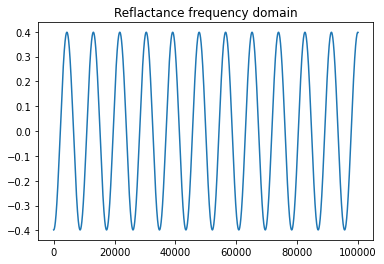

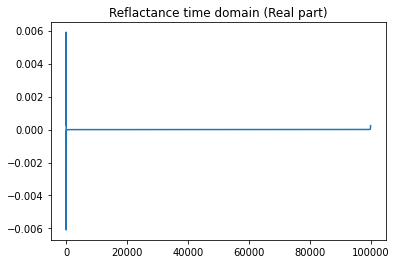

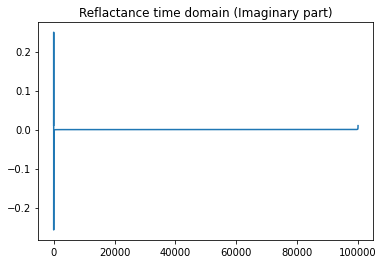

<Figure size 432x288 with 0 Axes>

In [4]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir
ndata=100000
w=np.linspace(0,100000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)
plt.plot(w,response)    
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift))
plt.title("Reflactance time domain (Real part)")
plt.figure()
plt.plot(np.imag(ift))
plt.title("Reflactance time domain (Imaginary part)")
plt.figure()

### Zoom

<Figure size 432x288 with 0 Axes>

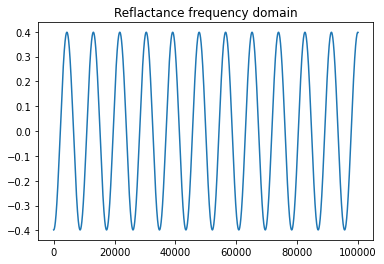

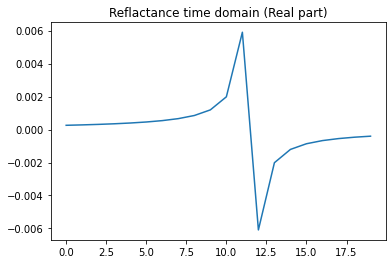

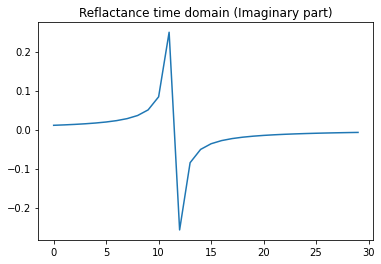

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:20]))
plt.title("Reflactance time domain (Real part)")
plt.figure()
plt.plot(np.imag(ift[0:30]))
plt.title("Reflactance time domain (Imaginary part)")
plt.figure()

# Open boundary with 1000000 frequency points

This is the same case as before but with a boundary condition as an open pipe where part of the wave is reflected and other part is transmited into free space.
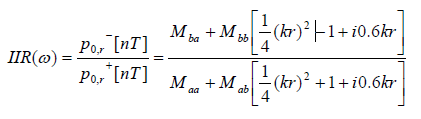

<Figure size 432x288 with 0 Axes>

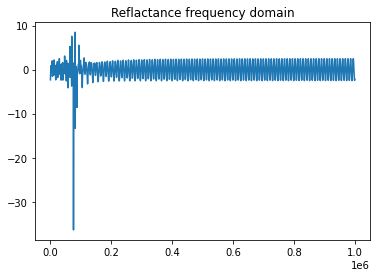

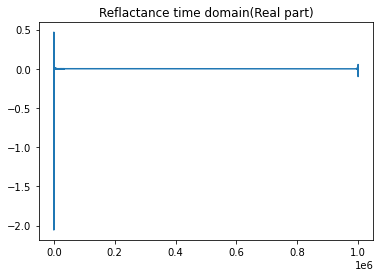

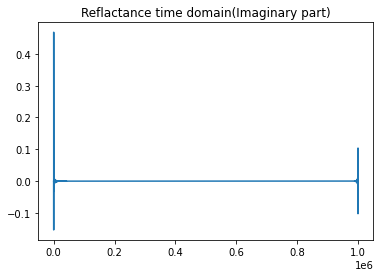

<Figure size 432x288 with 0 Axes>

In [6]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=1000000
w=np.linspace(0,1000000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

### Zoom

<Figure size 432x288 with 0 Axes>

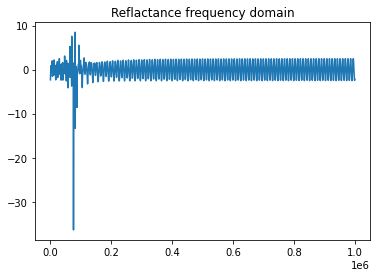

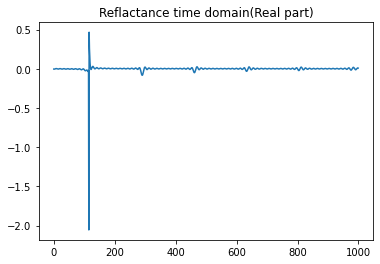

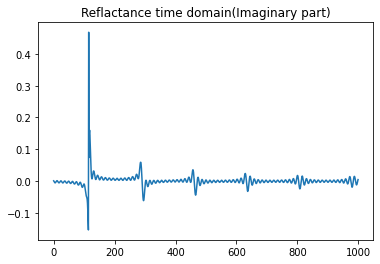

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:1000]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

<Figure size 432x288 with 0 Axes>

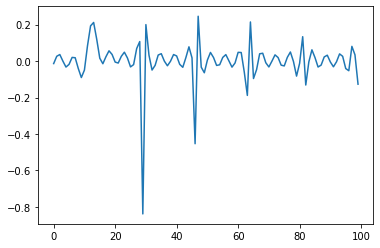

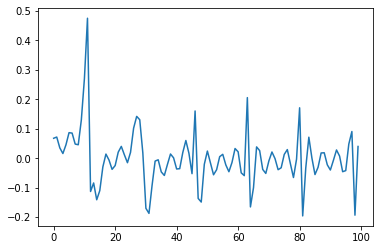

<Figure size 432x288 with 0 Axes>

In [21]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=100000
w=np.linspace(0,100000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)



# Open boundary with 500000

<Figure size 432x288 with 0 Axes>

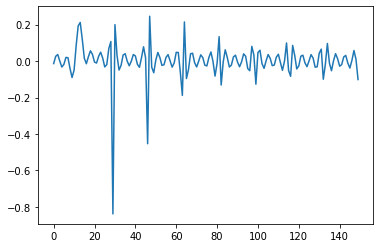

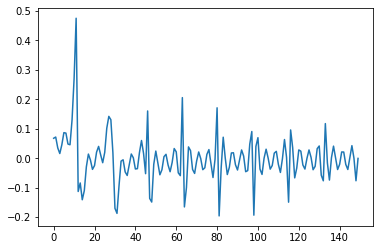

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(np.real(ift[0:150]))
plt.figure()
plt.plot(np.imag(ift[0:150]))
plt.figure()

# semi infinite boundary with 3 segments

In [30]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.400 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S3_length = 0.09 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos+1] = 0.0062
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube #(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)


<Figure size 432x288 with 0 Axes>

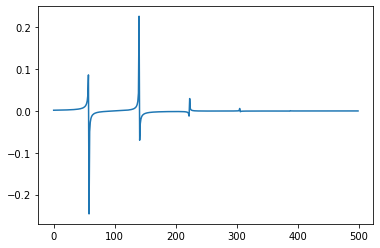

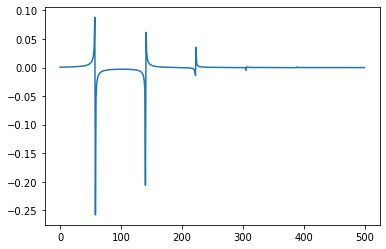

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(np.real(ift[0:500]))
plt.figure()
plt.plot(np.imag(ift[0:500]))
plt.figure()

# semi infinite boundary with 3 segments

In [33]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.400 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S3_length = 0.09 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos+1] = 0.0062
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

<Figure size 432x288 with 0 Axes>

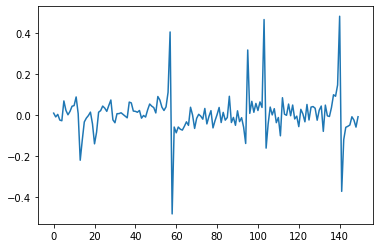

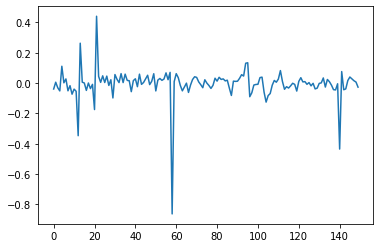

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(np.real(ift[0:150]))
plt.figure()
plt.plot(np.imag(ift[0:150]))
plt.figure()